## 构建一个基本的神经网络

In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


##### 添加Layer， 构造一个创建神经层的方法
    神经层里常见的参数通常有weights、biases和激励函数。

In [19]:
# 定义一个添加神经层的方法
def add_layer(inputs, in_size, out_size, activation_func=None):
    # 随机变量(normal distribution)会比全部为0要好很多
    ws = tf.Variable(tf.random_normal([in_size, out_size]))
    # biases的推荐值不为0
    # 这个初始化biases的时候，只是TF初始化需要[1, out_size]
    # 实际按照矩阵乘法应该[out_size， 1]
    bs = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    wx_b = tf.matmul(inputs, ws) + bs
    if activation_func is None:
        outputs = wx_b
    else:
        outputs = activation_func(wx_b)
    return outputs

初始化一些数据

In [12]:
# 300行，范围-1到1
x_data = np.linspace(-1, 1, 300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

    输入层：神经元跟输入一致
    隐藏层
    输出层：

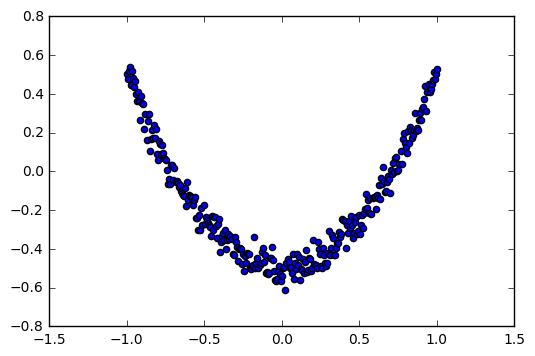

0.228447
0.068442
0.0293249
0.0143735
0.00840988
0.00577109
0.00531206
0.00506752
0.00477527
0.00440799
0.00407472
0.00378293
0.00355339
0.00336985
0.00322214
0.00311871
0.00306293
0.00302768
0.00298628
0.00295392


In [54]:
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

l1 = add_layer(xs, 1, 10, activation_func=tf.nn.relu)
prediction = add_layer(l1, 10, 1)

loss = tf.reduce_mean(tf.reduce_sum(
    tf.square(ys - prediction), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(x_data, y_data)
    plt.ion()
    plt.show()
    for i in range(1000):
        sess.run(train_step, feed_dict={xs: x_data, ys:y_data})
        if i % 50 == 0:
            print(sess.run(loss, feed_dict={xs: x_data, ys:y_data}))
            try:
                ax.lines.remove(lines[0])
            except Exception:
                pass
            prediction_value = sess.run(prediction, feed_dict={xs: x_data, ys:y_data})
            lines = ax.plot(x_data, prediction_value, 'r-', lw=2)
            plt.pause(0.1)